<a href="https://colab.research.google.com/github/Tofulati/LLNL_DataScience/blob/main/LLNL_DataScience_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMOTE Testing

## Look at the size of the data after oversampling

In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train = train.rename(columns={train.columns[-1]: 'Abnormality'})
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[: , -1]

## See spread of data prior to SMOTE

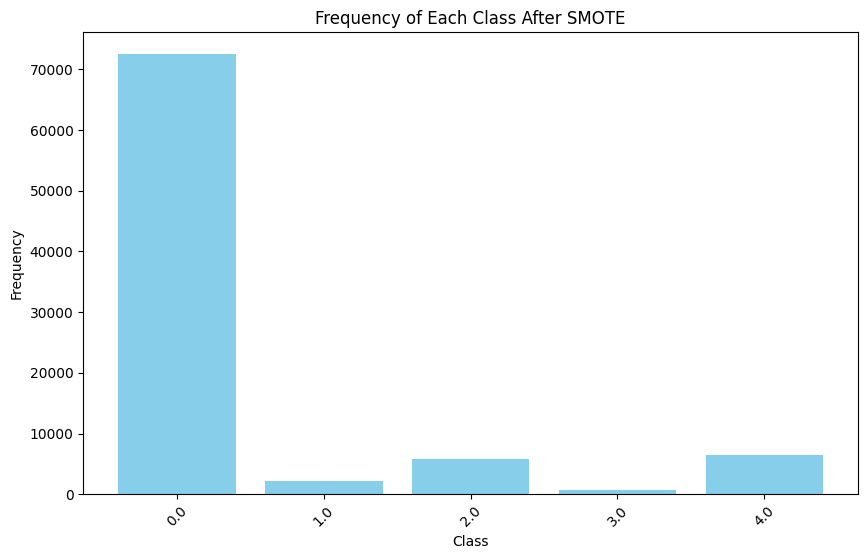

In [ ]:
# Count the frequency of each class in y_train
class_counts = pd.Series(y_train).value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class After SMOTE')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

Graphing histogram of data

<ipython-input-19-e45d7ae79d23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_res['score'] = y_train_res


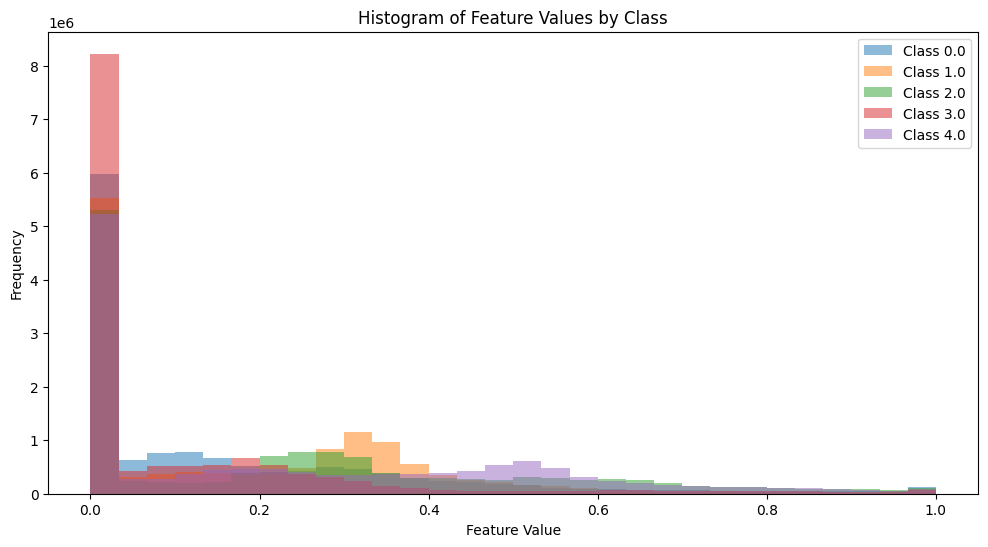

In [ ]:
# Create a DataFrame for easier plotting
df_res = pd.DataFrame(X_train_res)
df_res['score'] = y_train_res

# Plot histogram
plt.figure(figsize=(12, 6))

# Assuming 'score' is the class label
for label in y_train_res.unique():
    plt.hist(df_res[df_res['score'] == label].iloc[:, :-1].values.flatten(), bins=30, alpha=0.5, label=f'Class {label}')

plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Values by Class')
plt.legend()
plt.show()

<ipython-input-22-3616b76ca5e4>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_res['target'] = y_train_res


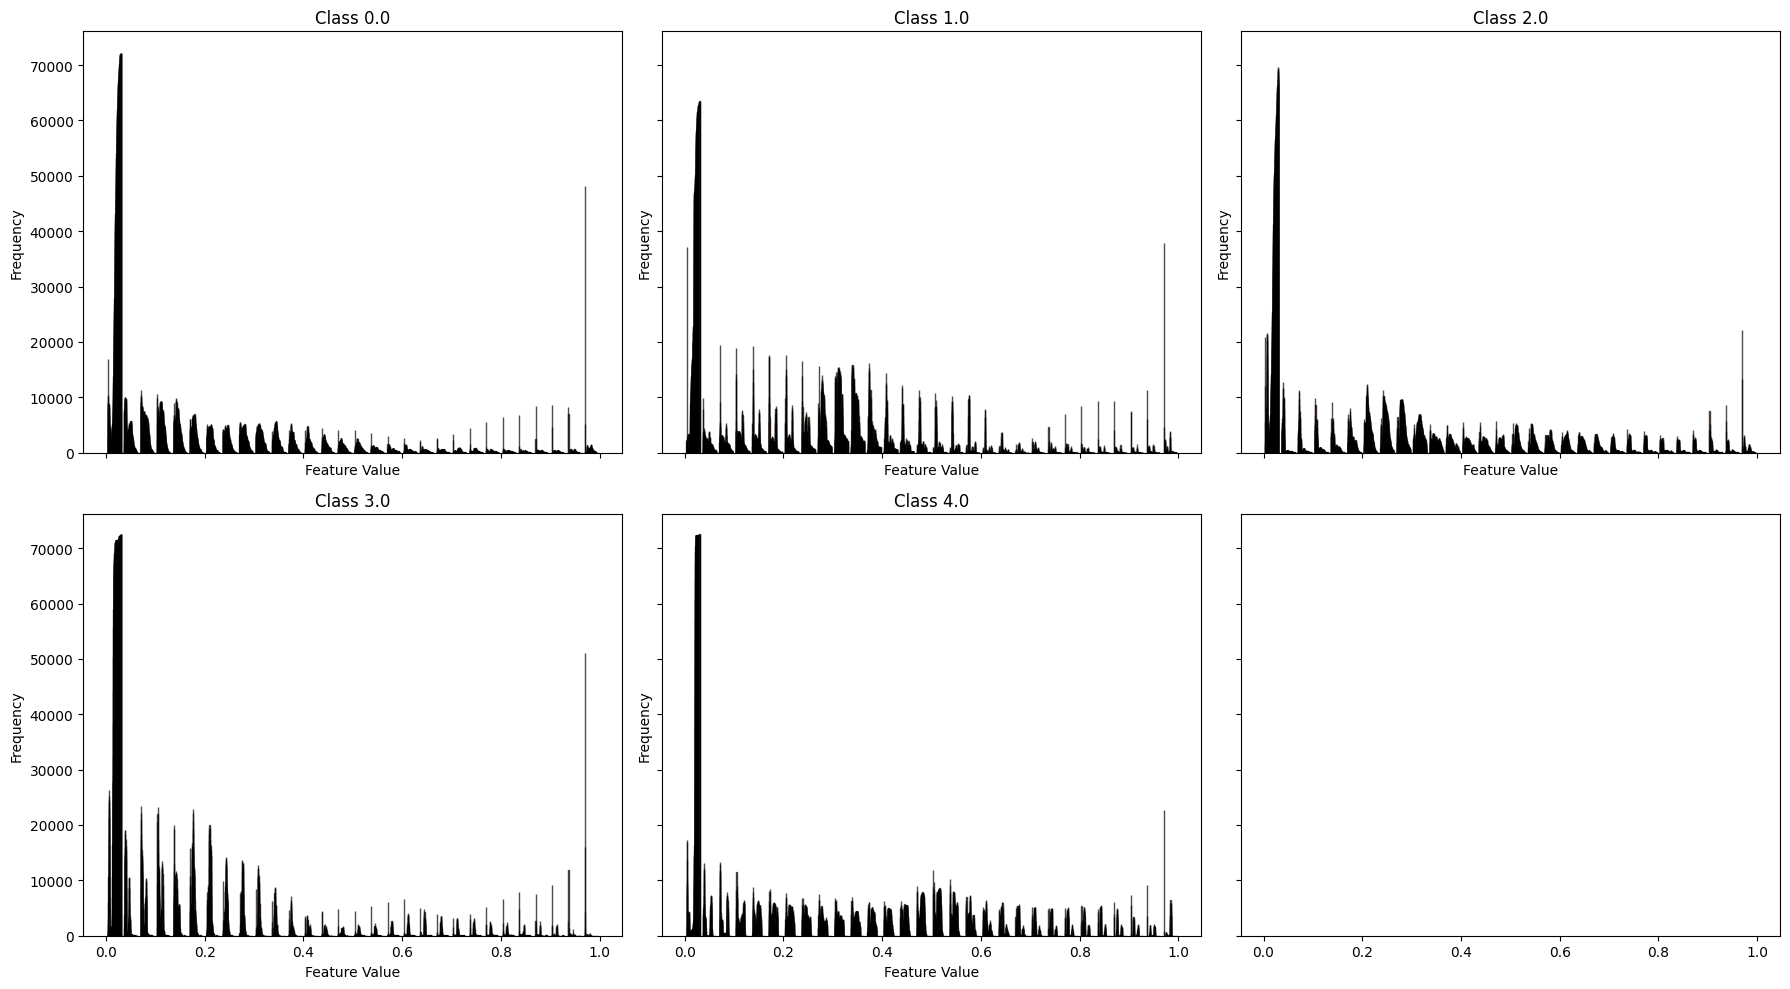

In [ ]:
df_res = pd.DataFrame(X_train_res)
df_res['target'] = y_train_res

# Get unique classes in the target variable
classes = y_train_res.unique()

# Plot histograms for each class
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, cls in enumerate(classes):
    # Filter data for the current class
    class_data = df_res[df_res['target'] == cls]

    # Plot histograms for each feature in the class data
    axes[i].hist(class_data.iloc[:, :-1].values, bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Class {cls}')
    axes[i].set_xlabel('Feature Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

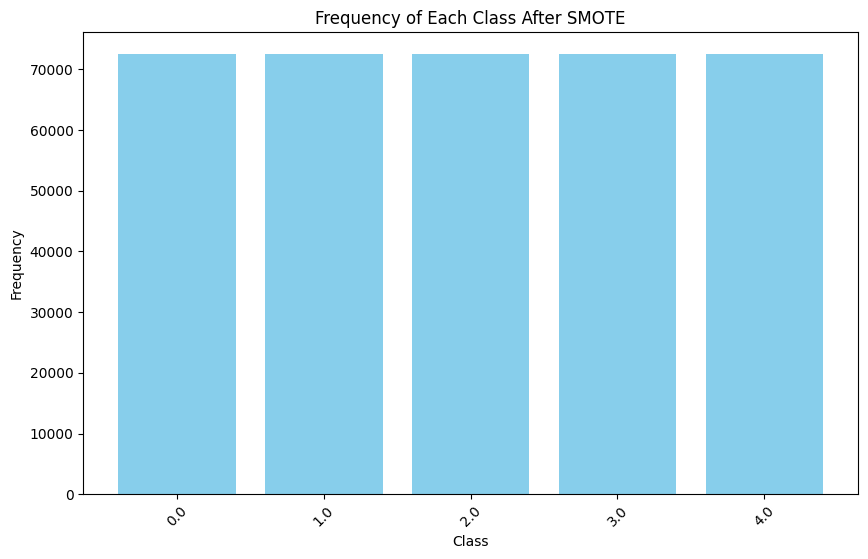

In [ ]:
# Count the frequency of each class in y_train_res
class_counts = pd.Series(y_train_res).value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class After SMOTE')
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train_res.describe()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
count,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,...,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000,362355.000000
mean,0.842670,0.738334,0.480850,0.312355,0.271339,0.263295,0.247823,0.235333,0.222315,0.203195,...,0.014493,0.013974,0.013453,0.012903,0.012247,0.011823,0.011558,0.011271,0.010858,0.010670
std,0.277786,0.259758,0.248532,0.249493,0.222725,0.204749,0.199965,0.188185,0.171359,0.162411,...,0.073176,0.071720,0.070828,0.068794,0.066746,0.065590,0.064772,0.063457,0.061740,0.060842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.835941,0.621408,0.280900,0.103448,0.106425,0.119197,0.103219,0.093021,0.088832,0.085897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.967254,0.833639,0.487823,0.268939,0.192353,0.179328,0.159824,0.173086,0.186296,0.161793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.921944,0.654234,0.465687,0.384385,0.384121,0.376179,0.348533,0.305466,0.268846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train_res.describe()

count    362355.000000
mean          2.000000
std           1.414216
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Abnormality, dtype: float64

## SMOTE Smaller sampling


In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv', header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
train = train.rename(columns={train.columns[-1]: 'Abnormality'})
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[: , -1]

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the desired number of samples for each class
sampling_strategy = {0: 80000, 1:80000 , 2: 80000, 3: 80000, 4: 80000}

# Example: Set the desired ratio of the minority class
smt = SMOTE(sampling_strategy=sampling_strategy)  # minority class will have half the samples of the majority class
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (80000) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 72471)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (80000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 72471)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (80000) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 72471)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (80000) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 72471)
  war

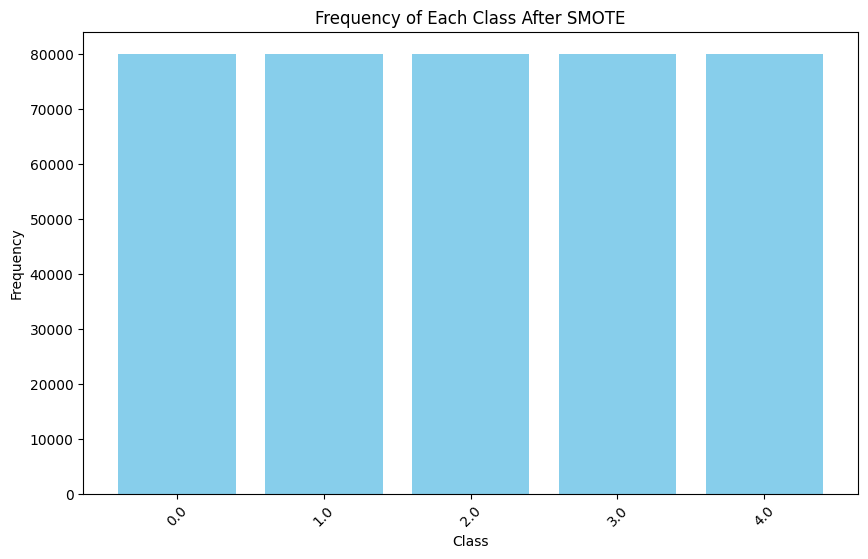

In [ ]:
# Count the frequency of each class in y_train_res
class_counts = pd.Series(y_train_res).value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class After SMOTE')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(class_counts.values)

[80000 80000 80000 80000 80000]


# Recurrent Neural Network Testing

## What are they?

Sure, let's break down what a Recurrent Neural Network (RNN) is in a simple and easy-to-understand way.

### What is a Recurrent Neural Network (RNN)?

Imagine you’re trying to understand a book. To make sense of it, you don’t just look at one sentence in isolation; you need to understand how each sentence relates to the previous ones. The context from earlier sentences helps you understand the current one. This is a bit like how Recurrent Neural Networks (RNNs) work with sequences of data.

#### Key Points About RNNs:

1. **Handling Sequences**:
   - RNNs are designed to handle sequences of data. This means they are great for tasks where the order of information matters, like in text, speech, or time-series data (e.g., stock prices over time).

2. **Memory**:
   - Unlike regular neural networks that only look at the current input, RNNs have a form of “memory” that allows them to remember information from previous inputs. This memory helps them make decisions based on the entire sequence of data, not just the current part.

3. **How It Works**:
   - **Step-by-Step Processing**: Imagine you have a sequence like a sentence: “The cat sat on the mat.” An RNN processes each word in the sentence one by one. It remembers the context of previous words while processing the current one.
   - **Feedback Loop**: RNNs have a loop mechanism. When they process an input (like a word), they pass information to the next step in the sequence. This means that each step in the sequence is influenced by what happened before.

4. **Training**:
   - Just like how you learn from reading many books and understanding the context of sentences, RNNs are trained using many sequences of data. They learn to predict what comes next in the sequence or classify the sequence into categories by understanding the patterns in the data.

5. **Applications**:
   - **Language Translation**: RNNs can translate sentences from one language to another by understanding the sequence of words.
   - **Speech Recognition**: They help in converting spoken language into text by processing the sequence of sounds.
   - **Time-Series Forecasting**: RNNs can predict future values in time-series data, like predicting stock prices based on past trends.

### Summary

Think of an RNN as a network that processes information in a sequence, remembers what it has learned so far, and uses that memory to make better predictions or decisions about what comes next in the sequence. This ability to handle and remember sequences makes RNNs very powerful for tasks involving time or order of data.

-CHATGPT

## How to improve RNNs?

Improving Recurrent Neural Networks (RNNs) involves addressing some of their limitations and leveraging advanced techniques to enhance their performance. Here are several approaches to make RNNs better:

### 1. **Use Advanced RNN Variants**

#### **Long Short-Term Memory (LSTM)**
- **Why**: LSTMs address the problem of long-term dependencies that standard RNNs struggle with. They are designed to remember information for long periods, which helps in tasks where context from far back in the sequence is important.
- **How**: LSTMs have a more complex structure with gates (input, forget, and output gates) that control the flow of information and prevent issues like vanishing gradients.

#### **Gated Recurrent Unit (GRU)**
- **Why**: GRUs are a simpler alternative to LSTMs that still handle long-term dependencies well. They combine the input and forget gates into a single gate, which can make them faster and less complex.
- **How**: GRUs use fewer gates and parameters compared to LSTMs, which can reduce computational cost while still maintaining performance.

### 2. **Bidirectional RNNs**

- **Why**: Standard RNNs process data in one direction (usually from past to future). Bidirectional RNNs process data in both directions (past-to-future and future-to-past), which can help capture more context.
- **How**: This involves adding two RNNs, one processing the sequence from the beginning to end and the other from the end to beginning, and then combining their outputs.

### 3. **Stacked RNNs**

- **Why**: Stacking multiple RNN layers can help the model capture more complex patterns in the data.
- **How**: Each layer learns different aspects of the sequence. The output from one RNN layer becomes the input for the next layer.

### 4. **Attention Mechanism**

- **Why**: The attention mechanism helps the model focus on different parts of the input sequence, making it easier to handle sequences where specific parts are more important.
- **How**: It assigns different weights to different parts of the input sequence, allowing the model to emphasize relevant information while processing the sequence.

### 5. **Regularization Techniques**

#### **Dropout**
- **Why**: Dropout helps prevent overfitting by randomly dropping units during training, which encourages the network to learn more robust features.
- **How**: Apply dropout to the RNN layers to improve generalization.

#### **Layer Normalization**
- **Why**: Normalizing the inputs to each layer helps stabilize and accelerate training.
- **How**: Apply normalization techniques like layer normalization to the RNN layers.

### 6. **Optimize Training**

#### **Gradient Clipping**
- **Why**: Gradient clipping helps manage exploding gradients, which can destabilize training.
- **How**: Set a threshold value for gradients, and clip any gradients that exceed this value to prevent them from growing too large.

#### **Learning Rate Scheduling**
- **Why**: Adjusting the learning rate during training can improve convergence.
- **How**: Use learning rate schedulers to reduce the learning rate as training progresses.

### 7. **Hybrid Models**

- **Why**: Combining RNNs with other types of neural networks can leverage their strengths.
- **How**: For example, combining RNNs with Convolutional Neural Networks (CNNs) for tasks that involve both spatial and temporal data, like video analysis.

### 8. **Use Pretrained Embeddings**

- **Why**: Pretrained word embeddings capture semantic meanings of words, which can improve performance on language tasks.
- **How**: Use embeddings like Word2Vec or GloVe to initialize the input layer of the RNN.

### Summary

To improve RNNs, you can use advanced variants like LSTMs or GRUs, apply techniques like attention mechanisms, and incorporate regularization and optimization strategies. Each of these methods addresses specific challenges of RNNs and enhances their ability to process sequential data effectively.

-CHATGPT

## RNN Implementation

Importing samples into the tensors

In [ ]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv')

# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # The last column

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Add a sequence length dimension
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a Dataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

- pandas: A tool to help read and manipulate data, like reading an Excel sheet.
- torch: The main tool for working with neural networks in this project.
- nn: Helps build neural networks.
- optim: Helps improve the neural network's learning process.
- TensorDataset and DataLoader: Help organize and handle our data in a way that the neural network can use.

- torch.tensor(X, dtype=torch.float32): Converts the NumPy array of features into a PyTorch tensor of type float (which is needed for neural networks).
- unsqueeze(1): Adds an extra dimension to the tensor to fit the expected input shape for the RNN.
- torch.tensor(y, dtype=torch.long): Converts the NumPy array of labels into a PyTorch tensor of type long (integer).

Ensure that the versions are correct

In [ ]:
print(torch.__version__)

2.3.1+cu121


Ensure that the data is loaded

In [ ]:
# Check the first few samples
for X_batch, y_batch in dataloader:
    print(X_batch.shape)
    print(y_batch.shape)
    break

torch.Size([64, 1, 187])
torch.Size([64])


Sample model from GPT, will alter to optimize

In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers=2, dropout=0.5):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Parameters
input_size = X_tensor.shape[2]
hidden_size = 128
num_classes = 5  # Corrected number of classes

model = RNNModel(input_size, hidden_size, num_classes)

- class RNNModel(nn.Module): Defines a new neural network model that inherits from PyTorch's nn.Module.
- init: This is the constructor method where we define the layers of the model.
  - self.rnn: An LSTM layer (a type of RNN) with input size (number of features), hidden size (number of units in the hidden layer), number of layers, dropout (a technique to prevent overfitting), batch_first (specifies the input shape), and bidirectional (processes data in both forward and backward directions).
  - self.fc: A fully connected (linear) layer that maps the output of the LSTM to the number of classes.
- forward(self, x): Defines the forward pass, i.e., how the input data passes through the model.
  - out, _ = self.rnn(x): Passes the input through the LSTM layer.
  - out = out[:, -1, :]: Takes the output from the last time step of the sequence.
  - out = self.fc(out): Passes the result through the fully connected layer to get the final output.


Define loss optimizer

In [ ]:
# Loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

- input_size: The number of features in the input data.
- hidden_size: The number of units in the hidden layer of the LSTM.
- num_classes: The number of classes the model needs to classify (5 in this case).
- model = RNNModel(input_size, hidden_size, num_classes): Initializes the RNN model.
- criterion = nn.CrossEntropyLoss(): Defines the loss function (Cross Entropy Loss), which measures how well the model's predictions match the actual labels.
- optimizer = optim.Adam(model.parameters(), lr=0.001): Defines the optimization algorithm (Adam) with a learning rate of 0.001.
- scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1): Defines a learning rate scheduler that decreases the learning rate by a factor of 0.1 every 5 epochs.

Training loop

In [ ]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Step the scheduler at the end of each epoch
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0124
Epoch [2/20], Loss: 0.0010
Epoch [3/20], Loss: 0.0043
Epoch [4/20], Loss: 2.5631
Epoch [5/20], Loss: 0.0011
Epoch [6/20], Loss: 1.1597
Epoch [7/20], Loss: 0.0135
Epoch [8/20], Loss: 0.0093
Epoch [9/20], Loss: 1.8720
Epoch [10/20], Loss: 0.0072
Epoch [11/20], Loss: 0.0054
Epoch [12/20], Loss: 0.6022
Epoch [13/20], Loss: 0.0137
Epoch [14/20], Loss: 0.0002
Epoch [15/20], Loss: 0.0126
Epoch [16/20], Loss: 0.0039
Epoch [17/20], Loss: 0.0052
Epoch [18/20], Loss: 0.0035
Epoch [19/20], Loss: 0.1538
Epoch [20/20], Loss: 0.0023


- num_epochs = 20: Number of times to go through the entire dataset.
- for epoch in range(num_epochs): Loop over the number of epochs.
- for X_batch, y_batch in dataloader: Loop over each batch of data.
  - outputs = model(X_batch): Pass the batch through the model to get predictions.
  - loss = criterion(outputs, y_batch): Calculate the loss.
  - optimizer.zero_grad(): Clear previous gradients.
  - loss.backward(): Compute the gradients of the loss with respect to the model parameters.
  - optimizer.step(): Update the model parameters.
- scheduler.step(): Update the learning rate.
- print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}'): Print the loss after each epoch.


Evaluation

In [ ]:
# Evaluation function
def evaluate(model, dataloader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in dataloader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
        accuracy = 100 * correct / total
        print(f'Accuracy: {accuracy:.2f}%')

# Evaluate the model
evaluate(model, dataloader)

Accuracy: 97.41%


- def evaluate(model, dataloader): Defines a function to evaluate the model.
- model.eval(): Puts the model in evaluation mode (disables dropout and other training-specific layers).
- with torch.no_grad(): Disables gradient computation, which saves memory and speeds up evaluation.
- correct = 0, total = 0: Initialize counters for correct predictions and total samples.
- for X_batch, y_batch in dataloader: Loop over each batch of data.
  - outputs = model(X_batch): Get predictions from the model.
  - _, predicted = torch.max(outputs.data, 1): Get the class with the highest score for each sample.
  - total += y_batch.size(0): Increment the total number of samples.
  - correct += (predicted == y_batch).sum().item(): Increment the number of correct predictions.
- accuracy = 100 * correct / total: Calculate the accuracy as a percentage.
- print(f'Accuracy: {accuracy:.2f}%'): Print the accuracy.

# XGBoost on un-altered dataset

Learn more: https://www.nvidia.com/en-us/glossary/xgboost/#:~:text=XGBoost%2C%20which%20stands%20for%20Extreme,%2C%20classification%2C%20and%20ranking%20problems.

In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train = train.rename(columns={train.columns[-1]: 'Abnormality'})
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = test.rename(columns={test.columns[-1]: 'Abnormality'})
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[: , -1]

In [ ]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[: , -1]

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(learning_rate=0.2, max_depth=6, n_estimators=200)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_test_pred = xgbc.predict(X_test)
xgbc.predict(X_test)

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred, normalize=True)

0.981545770144345

Make confusion matrixes for each of the individual classes

OHE: One Hot Encoding

Creates columns for each of the categories and shows true or false for each of the categories

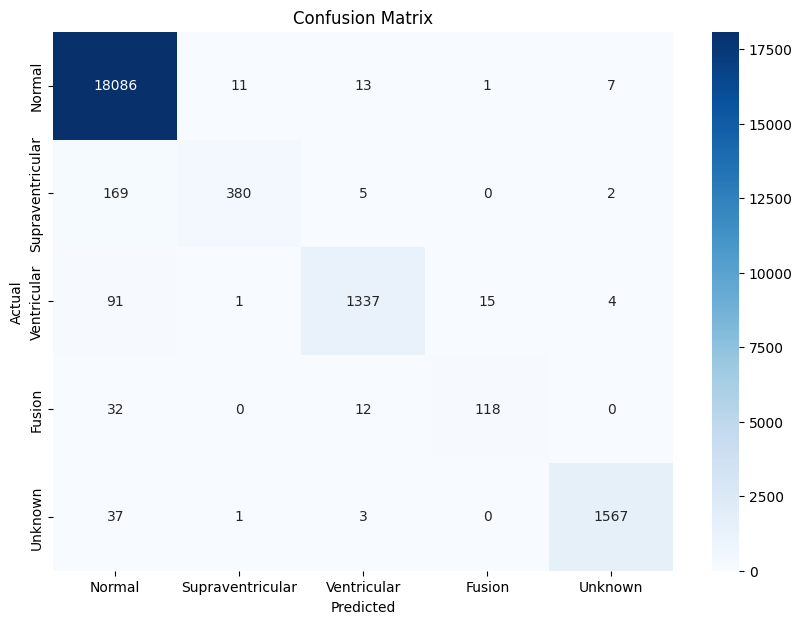

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

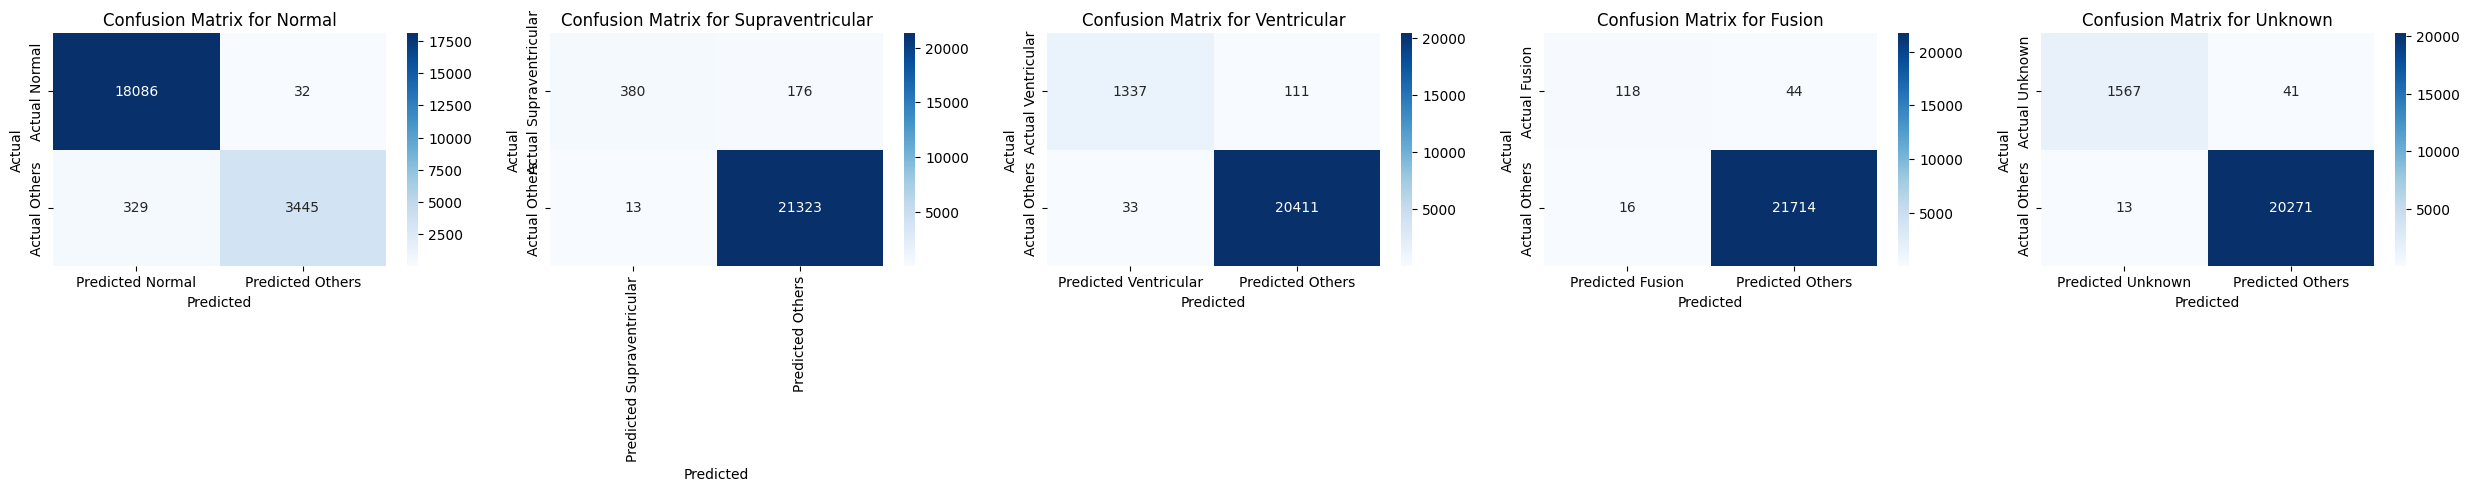

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Testing Models for Task 2

### Grid Searching to find optimized parameters

metric: f1 score

f1 = 2 * (precision * recall)/(precision + recall)

xgBoost, lightGBM, random forest, svm

In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train = train.rename(columns={train.columns[-1]: 'Abnormality'})
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = test.rename(columns={test.columns[-1]: 'Abnormality'})
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,Abnormality
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[: , -1]

In [ ]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[: , -1]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grids for each model
# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
# }

param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'sigmoid']
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 62],
    'learning_rate': [0.01, 0.1],
}

# Create the classifiers
# rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Define the scorers
scorer = make_scorer(f1_score, average='macro')

# Create the GridSearchCV objects
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring=scorer, cv=5, n_jobs=-1)
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, scoring=scorer, cv=5, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=scorer, cv=5, n_jobs=-1)
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid searches
# grid_search_rf.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_lgbm.fit(X_train, y_train)

# Get the best models and parameters
# best_rf = grid_search_rf.best_estimator_
best_svc = grid_search_svc.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_lgbm = grid_search_lgbm.best_estimator_

# print("Best Random Forest parameters:", grid_search_rf.best_params_)
print("Best SVM parameters:", grid_search_svc.best_params_)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best LightGBM parameters:", grid_search_lgbm.best_params_)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


NameError: name 'X_train' is not defined

Certainly! Here are explanations for the hyperparameters listed in the grid search for each model:

### RandomForestClassifier
- **n_estimators**: The number of trees in the forest. Higher values can increase accuracy but also computation time.
- **max_depth**: The maximum depth of the tree. If None, nodes are expanded until all leaves contain less than `min_samples_split` samples.
- **min_samples_split**: The minimum number of samples required to split an internal node. A higher value prevents overfitting.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A higher value can smooth the model.
- **bootstrap**: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

### SVC (Support Vector Classifier)
- **C**: The regularization parameter. A higher value tries to classify all training examples correctly, which may lead to overfitting.
- **gamma**: The kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. It defines how far the influence of a single training example reaches.
- **kernel**: Specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, or ‘sigmoid’.

### XGBClassifier (XGBoost)
- **n_estimators**: The number of gradient boosted trees. Equivalent to the number of boosting rounds.
- **max_depth**: Maximum depth of a tree. Increasing this value makes the model more complex and likely to overfit.
- **learning_rate**: Step size shrinkage used to prevent overfitting. Smaller values make the model more robust.
- **subsample**: The fraction of samples to be used for fitting the individual base learners. Lower values can help prevent overfitting but may increase variance.

### LGBMClassifier (LightGBM)
- **n_estimators**: The number of boosting rounds.
- **num_leaves**: The maximum number of leaves in one tree. Higher values increase model complexity.
- **learning_rate**: Controls the step size at each iteration while moving toward a minimum of a loss function. Smaller values make the model more robust.
- **boosting_type**: Type of boosting algorithm to use. ‘gbdt’ for traditional Gradient Boosting Decision Tree, and ‘dart’ for Dropouts meet Multiple Additive Regression Trees.

These parameters control various aspects of the learning process for each model, affecting their complexity, ability to generalize, and computation time. GridSearchCV will try all the combinations of these hyperparameters to find the best model according to the scoring metric defined (in this case, the F1 score).

The `average='weighted'` parameter in the `f1_score` function specifies the method used to calculate the F1 score for multiclass classification. Here’s a detailed explanation:

### F1 Score for Multiclass Classification

The F1 score is a measure of a test's accuracy and is the harmonic mean of precision and recall. For binary classification, it is straightforward, but for multiclass classification, there are several ways to aggregate F1 scores across multiple classes.

### Average Parameter Options

1. **'micro'**:
   - Calculates metrics globally by counting the total true positives, false negatives, and false positives.
   - Suitable when you care equally about the performance on each instance.

2. **'macro'**:
   - Calculates metrics for each label, and finds their unweighted mean.
   - Does not take label imbalance into account.

3. **'weighted'**:
   - Calculates metrics for each label, and finds their average weighted by support (the number of true instances for each label).
   - This alters 'macro' to account for label imbalance.
   - Ensures that the performance of more common classes has more influence on the final score than the performance of less common classes.

4. **'samples'**:
   - Calculates metrics for each instance, and finds their average (only meaningful for multilabel classification).

### Why Use 'weighted'?

When using `average='weighted'`, the F1 score is calculated for each class individually, and then these scores are averaged using a weight that is proportional to the number of true instances for each class (i.e., the support). This approach is particularly useful when you have an imbalanced dataset, as it ensures that the contributions of each class to the overall F1 score reflect their relative frequencies in the dataset.

### Example:

Suppose you have a dataset with three classes: A, B, and C, with the following true instance counts:
- Class A: 50 instances
- Class B: 30 instances
- Class C: 20 instances

If you calculate the F1 score for each class and get the following values:
- F1(A) = 0.9
- F1(B) = 0.6
- F1(C) = 0.4

The weighted F1 score would be:
\[ \text{Weighted F1} = \frac{(50 \times 0.9) + (30 \times 0.6) + (20 \times 0.4)}{50 + 30 + 20} \]

This weighted average takes into account that class A has more instances and therefore has a larger impact on the final score compared to classes B and C.

### In Grid Search:

Using `average='weighted'` in a grid search ensures that the scoring method reflects the performance on the entire dataset, considering the imbalance between classes. This helps in selecting models that perform well across all classes, especially in scenarios where some classes are more prevalent than others.

-CHATGPT

## Task 3 Testing

In [ ]:
import os
%cd /content/drive/Shareddrives/LLNL_DataScience/data_3_4
print('The working directory is :{}'.format(os.getcwd()))

/content/drive/Shareddrives/LLNL_DataScience/data_3_4
The working directory is :/content/drive/Shareddrives/LLNL_DataScience/data_3_4


In [ ]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [ ]:
# file containing functions for cardiac ml
import glob, re, os
from typing import List
import numpy as np

# funtion to read the data
def read_data_dirs(
        dirs_names : List[str] = ['../intracardiac_dataset/data_hearts_dd_0p2/'],
        verbose : int = 0) -> List[List[str]]:
    """
    Read the numpy files in the given directories.
    Returns a list of file pairs ECG/Vm.

    Parameters
    ----------
    dirs_names : List[str]
        List of directories containing the data.
    verbose : int
        Verbosity level.

    Returns
    -------
    file_pairs : List[List[str]]
        List of file pairs.
    """
    file_pairs = []

    for dir in dirs_names:
        all_files = sorted(glob.glob(dir + '/*.npy'))
        files_Vm=[]
        files_pECG=[]

        if verbose > 0:
            print('Reading files...',end='')
        for file in all_files:
            if 'VmData' in file:
                files_Vm.append(file)
            if 'pECGData' in file:
                files_pECG.append(file)
        if verbose > 0:
            print(' done.')

        if verbose > 0:
            print('len(files_pECG) : {}'.format(len(files_pECG)))
            print('len(files_Vm) : {}'.format(len(files_Vm)))

        for i in range(len(files_pECG)):
            VmName =  files_Vm[i]
            VmName = VmName.replace('VmData', '')
            pECGName =  files_pECG[i]
            pECGName = pECGName.replace('pECGData', '')
            if pECGName == VmName :
                file_pairs.append([files_pECG[i], files_Vm[i]])
            else:
                print('Automatic sorted not matching, looking for pairs ...',end='')
                for j in range(len(files_Vm)):
                    VmName =  files_Vm[j]
                    VmName = VmName.replace('VmData', '')
                    if pECGName == VmName :
                        file_pairs.append([files_pECG[i], files_Vm[j]])
                print('done.')
    return file_pairs


# function to transform the data
def get_standard_leads(
        pECGnumpy : np.ndarray
    ) -> np.ndarray :
    """
    Get the standard 12-lead from the 10-lead ECG.

    Parameters
    ----------
    pECGnumpy : np.ndarray
        10-lead ECG.

    Returns
    -------
    ecg12aux : np.ndarray
        12-lead ECG.
    """
    # pECGnumpy  : RA LA LL RL V1 V2 V3 V4 V5 V6
    # ecg12aux : i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6
    ecg12aux = np.zeros((pECGnumpy.shape[0],12))
    WilsonLead = 0.33333333 * (pECGnumpy[:,0] + pECGnumpy[:,1] + pECGnumpy[:,2])
    # Lead I: LA - RA
    ecg12aux[:,0] = pECGnumpy[:,1] - pECGnumpy[:,0]
    # Lead II: LL - RA
    ecg12aux[:,1] = pECGnumpy[:,2] - pECGnumpy[:,0]
    # Lead III: LL - LA
    ecg12aux[:,2] = pECGnumpy[:,2] - pECGnumpy[:,1]
    # Lead aVR: 3/2 (RA - Vw)
    ecg12aux[:,3] = 1.5*(pECGnumpy[:,0] - WilsonLead)
    # Lead aVL: 3/2 (LA - Vw)
    ecg12aux[:,4] = 1.5*(pECGnumpy[:,1] - WilsonLead)
    # Lead aVF: 3/2 (LL - Vw)
    ecg12aux[:,5] = 1.5*(pECGnumpy[:,2] - WilsonLead)
    # Lead V1: V1 - Vw
    ecg12aux[:,6] = pECGnumpy[:,4] - WilsonLead
    # Lead V2: V2 - Vw
    ecg12aux[:,7] = pECGnumpy[:,5] - WilsonLead
    # Lead V3: V3 - Vw
    ecg12aux[:,8] = pECGnumpy[:,6] - WilsonLead
    # Lead V4: V4 - Vw
    ecg12aux[:,9] = pECGnumpy[:,7] - WilsonLead
    # Lead V5: V5 - Vw
    ecg12aux[:,10] = pECGnumpy[:,8] - WilsonLead
    # Lead V6: V6 - Vw
    ecg12aux[:,11] = pECGnumpy[:,9] - WilsonLead

    return ecg12aux

# funtion to get the activation time
def get_activation_time(
        Vm : np.ndarray
    ) -> np.ndarray :
    """
    Get the activation time from the Vm.

    Parameters
    ----------
    Vm : np.ndarray
        Vm.

    Returns
    -------
    actTime : np.ndarray
        Activation time.
    """
    actTime = []
    # check that Vm has 75 columns
    if Vm.shape[1] != 75:
        print('Error: Vm does not have 75 columns')
        return actTime
    for col in range(0,75,1):
        actTime.append(np.argmax(Vm[:,col]>0))
    actTime = np.asarray(actTime)
    actTime = np.reshape(actTime,(75,1))
    return actTime

In [ ]:
 def read_data_dirs(dirs_names, verbose = 0):

     file_pairs = []

     for dir in dirs_names:
         all_files = sorted(glob.glob(dir + '/*.npy'))
         files_Vm=[]
         files_pECG=[]

         if verbose > 0:
             print('Reading files...',end='')
         for file in all_files:
             if 'VmData' in file:
                 files_Vm.append(file)
             if 'pECGData' in file:
                 files_pECG.append(file)
         if verbose > 0:
             print(' done.')

         if verbose > 0:
             print('len(files_pECG) : {}'.format(len(files_pECG)))
             print('len(files_Vm) : {}'.format(len(files_Vm)))

         for i in range(len(files_pECG)):
             VmName =  files_Vm[i]
             VmName = VmName.replace('VmData', '')
             pECGName =  files_pECG[i]
             pECGName = pECGName.replace('pECGData', '')
             if pECGName == VmName :
                file_pairs.append([files_pECG[i], files_Vm[i]])
             else:
                 print('Automatic sorted not matching, looking for pairs ...',end='')
                 for j in range(len(files_Vm)):
                     VmName =  files_Vm[j]
                     VmName = VmName.replace('VmData', '')
                     if pECGName == VmName :
                         file_pairs.append([files_pECG[i], files_Vm[j]])
                 print('done.')
     return file_pairs

In [ ]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
for x in os.listdir('./'):
    if re.match(regex, x):
        data_dirs.append(x)

file_pairs = read_data_dirs(data_dirs, verbose=1)
len(file_pairs)

Reading files... done.
len(files_pECG) : 435
len(files_Vm) : 435
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 699
len(files_Vm) : 699
Reading files... done.
len(files_pECG) : 1040
len(files_Vm) : 1040
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 1040
len(files_Vm) : 1040
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 699
len(files_Vm) : 722
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic so

16117

Case 213 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy


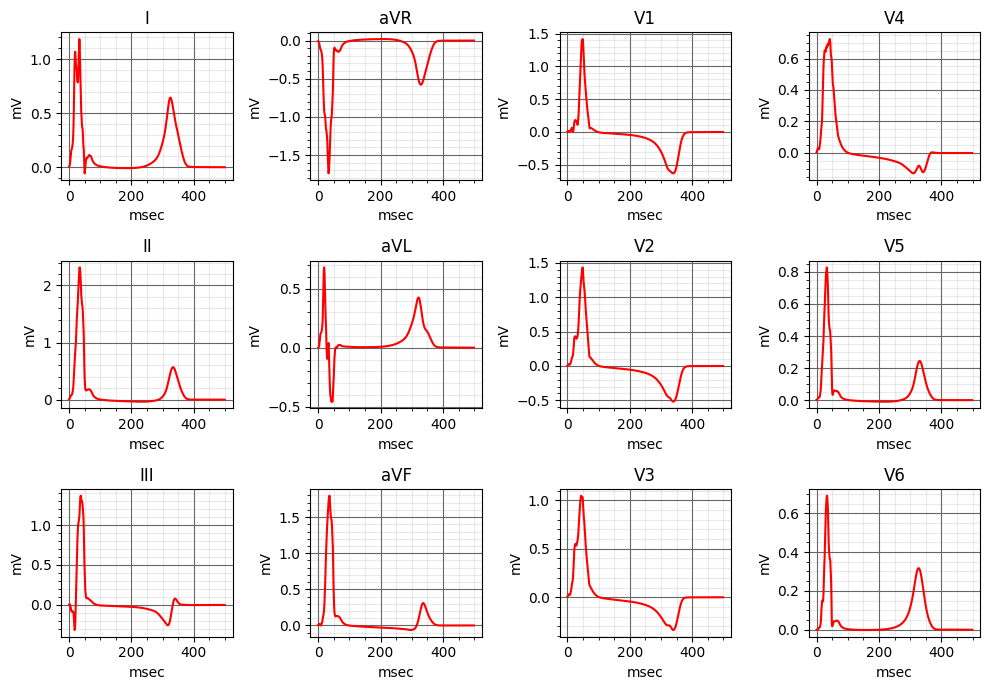

In [ ]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

Case 10 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v10_pattern.18.npy


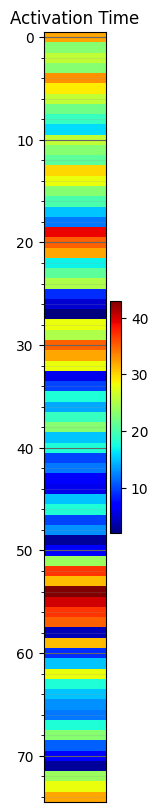

In [ ]:
# Example of file pair
import matplotlib.pyplot as plt

case = 10
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [ ]:
train_ecg_data = torch.load("train_ecg_data.pt")
test_ecg_data = torch.load("test_ecg_data.pt")

train_vm_data = torch.load("train_vm_data.pt")
test_vm_data = torch.load("test_vm_data.pt")

train_vm_activations = torch.load("train_vm_activations.pt")
test_vm_activations = torch.load("test_vm_activations.pt")

print(train_ecg_data.size())
print(test_ecg_data.size())

print(train_vm_data.size())
print(test_vm_data.size())

print(train_vm_activations.size())
print(test_vm_activations.size())

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
# Convert data to numpy arrays for splitting
train_ecg_data_np = train_ecg_data.numpy()
train_vm_data_np = train_vm_data.numpy()
train_vm_activations_np = train_vm_activations.numpy()
# Create indices and split into train and test sets
num_samples = train_ecg_data_np.shape[2]
indices = np.arange(num_samples)
train_indices, valid_indices = train_test_split(indices, test_size=0.1, random_state=42)  # Adjust the test_size as needed
# Index into the data arrays to create train and test sets
train_ecg_data = train_ecg_data_np[:, :, train_indices]
valid_ecg_data = train_ecg_data_np[:, :, valid_indices]
train_vm_data = train_vm_data_np[:, :, train_indices]
valid_vm_data = train_vm_data_np[:, :, valid_indices]
train_vm_activations = train_vm_activations_np[train_indices, :]
valid_vm_activations = train_vm_activations_np[valid_indices, :]
# Convert back to torch tensors if needed
train_ecg_data = torch.Tensor(train_ecg_data)
valid_ecg_data = torch.Tensor(valid_ecg_data)
train_vm_data = torch.Tensor(train_vm_data)
valid_vm_data = torch.Tensor(valid_vm_data)
train_vm_activations = torch.Tensor(train_vm_activations)
valid_vm_activations = torch.Tensor(valid_vm_activations)
print("Training ECG data shape: ", train_ecg_data.size())
print("Validation ECG data shape: ", valid_ecg_data.size())
print("Training VM data shape: ", train_vm_data.size())
print("Validation VM data shape: ", valid_vm_data.size())
print("Training VM activations shape: ", train_vm_activations.size())
print("Validation VM activations shape: ", valid_vm_activations.size())

## Designing SqueezeNet

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Fire(nn.Module):
    def __init__(self, in_channel, squeeze_channel, expand_channel):
        super(Fire, self).__init__()
        self.squeeze = nn.Conv1d(in_channel, squeeze_channel, kernel_size=1)
        self.squeeze_activation = nn.ReLU(inplace=True)
        self.expand1x1 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=1)
        self.expand3x3 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=3, padding=1)
        self.expand_activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.squeeze_activation(self.squeeze(x))
        return self.expand_activation(torch.cat([
            self.expand1x1(x),
            self.expand3x3(x)
        ], 1))

class SqueezeNetECGtoVM(nn.Module):
    def __init__(self):
        super(SqueezeNetECGtoVM, self).__init__()
        self.conv1 = nn.Conv1d(12, 64, kernel_size=5, stride=2, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire2 = Fire(64, 16, 64)
        self.fire3 = Fire(128, 16, 64)

        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire4 = Fire(128, 32, 128)
        self.fire5 = Fire(256, 32, 128)

        self.maxpool3 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire6 = Fire(256, 48, 192)
        self.fire7 = Fire(384, 48, 192)
        self.fire8 = Fire(384, 64, 256)
        self.fire9 = Fire(512, 64, 256)

        self.dropout = nn.Dropout(p=0.1)

        self.conv2 = nn.Conv1d(512, 75, kernel_size=3, stride=2, padding=0)
        self.avgpool = nn.AdaptiveAvgPool1d(3)  # Ensures output shape matches input sequence length
        self.conv3 = nn.Conv1d(75, 75, kernel_size=3, stride=2, padding=0)

    def forward(self, x):
        #print("Shape start:", x.size())
        x = self.relu(self.conv1(x))
        #print("Shape after conv1:", x.size())

        x = self.maxpool1(x)
        #print("Shape after maxpool1:", x.size())

        x = self.fire2(x)
        #print("Shape after fire2:", x.size())
        x = self.fire3(x)
        #print("Shape after fire3:", x.size())

        x = self.maxpool2(x)
        #print("Shape after maxpool2:", x.size())

        x = self.fire4(x)
        #print("Shape after fire4:", x.size())
        x = self.fire5(x)
        #print("Shape after fire5:", x.size())

        x = self.maxpool3(x)
        #print("Shape after maxpool3:", x.size())

        x = self.fire6(x)
        #print("Shape after fire6:", x.size())
        x = self.fire7(x)
        #print("Shape after fire7:", x.size())
        x = self.fire8(x)
        #print("Shape after fire8:", x.size())
        x = self.fire9(x)
        #print("Shape after fire9:", x.size())

        x = self.dropout(x)
        #print("Shape after dropout:", x.size())
        x = self.conv2(x)
        #print("Shape after conv2:", x.size())

        x = self.avgpool(x)
        #print("Shape after avgpool:", x.size())
        x = self.conv3(x)
        #print("Shape after conv3:", x.size())

        return x

# Example usage
model = SqueezeNetECGtoVM()
all_ecg_data = torch.randn(500, 12, 64)  # Example input tensor with batch size 50
output = model(all_ecg_data.permute(2, 1, 0))  # Permuting to (N, 12, 500) to match Conv1d input shape
print(output.shape)  # Should output (50, 75, 500) which will be permuted back to (500, 75, N)

torch.Size([64, 75, 1])


In [ ]:
train_ecg_data = torch.load("train_ecg_data.pt")
test_ecg_data = torch.load("test_ecg_data.pt")

train_vm_data = torch.load("train_vm_data.pt")
test_vm_data = torch.load("test_vm_data.pt")

train_vm_activations = torch.load("train_vm_activations.pt")
test_vm_activations = torch.load("test_vm_activations.pt")

print(train_ecg_data.size())
print(test_ecg_data.size())

print(train_vm_data.size())
print(test_vm_data.size())

print(train_vm_activations.size())
print(test_vm_activations.size())

torch.Size([500, 12, 14505])
torch.Size([500, 12, 1612])
torch.Size([500, 75, 14505])
torch.Size([500, 75, 1612])
torch.Size([14505, 75])
torch.Size([1612, 75])


In [ ]:
from sklearn.model_selection import train_test_split
# Convert data to numpy arrays for splitting
train_ecg_data_np = train_ecg_data.numpy()
train_vm_data_np = train_vm_data.numpy()
train_vm_activations_np = train_vm_activations.numpy()
# Create indices and split into train and test sets
num_samples = train_ecg_data_np.shape[2]
indices = np.arange(num_samples)
train_indices, valid_indices = train_test_split(indices, test_size=0.1, random_state=42)  # Adjust the test_size as needed
# Index into the data arrays to create train and test sets
train_ecg_data = train_ecg_data_np[:, :, train_indices]
valid_ecg_data = train_ecg_data_np[:, :, valid_indices]
train_vm_data = train_vm_data_np[:, :, train_indices]
valid_vm_data = train_vm_data_np[:, :, valid_indices]
train_vm_activations = train_vm_activations_np[train_indices, :]
valid_vm_activations = train_vm_activations_np[valid_indices, :]
# Convert back to torch tensors if needed
train_ecg_data = torch.Tensor(train_ecg_data)
valid_ecg_data = torch.Tensor(valid_ecg_data)
train_vm_data = torch.Tensor(train_vm_data)
valid_vm_data = torch.Tensor(valid_vm_data)
train_vm_activations = torch.Tensor(train_vm_activations)
valid_vm_activations = torch.Tensor(valid_vm_activations)
print("Training ECG data shape: ", train_ecg_data.size())
print("Validation ECG data shape: ", valid_ecg_data.size())
print("Training VM data shape: ", train_vm_data.size())
print("Validation VM data shape: ", valid_vm_data.size())
print("Training VM activations shape: ", train_vm_activations.size())
print("Validation VM activations shape: ", valid_vm_activations.size())

Training ECG data shape:  torch.Size([14505, 12, 450])
Validation ECG data shape:  torch.Size([14505, 12, 50])
Training VM data shape:  torch.Size([500, 75, 450])
Validation VM data shape:  torch.Size([500, 75, 50])
Training VM activations shape:  torch.Size([450, 75])
Validation VM activations shape:  torch.Size([50, 75])


In [ ]:
# Transpose training data tensors to match sizes
train_ecg_data = train_ecg_data.permute(2, 1, 0)  # (N, 75, 500)
valid_ecg_data = valid_ecg_data.permute(2, 1, 0)  # (N, 12, 500)

print(train_ecg_data.size())
print(valid_ecg_data.size())

torch.Size([14505, 12, 500])
torch.Size([14505, 12, 50])


In [ ]:
test_ecg_data = test_ecg_data.permute(2, 1, 0)  # (N, 12, 500)
print(test_ecg_data.size())
print(test_vm_activations.size())

torch.Size([1612, 12, 500])
torch.Size([1612, 75])


In [ ]:
test_set = TensorDataset(test_ecg_data, test_vm_activations)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

In [ ]:
count = 0
for inputs, targets in test_loader:
    outputs = model(inputs).squeeze(dim=2)
    if count == 0:
        a_true1 = targets[3]
        a_pred1 = outputs[3]

        a_true2 = targets[13]
        a_pred2 = outputs[13]

        a_true3 = targets[23]
        a_pred3 = outputs[23]

        a_true4 = targets[53]
        a_pred4 = outputs[53]

    count += 1

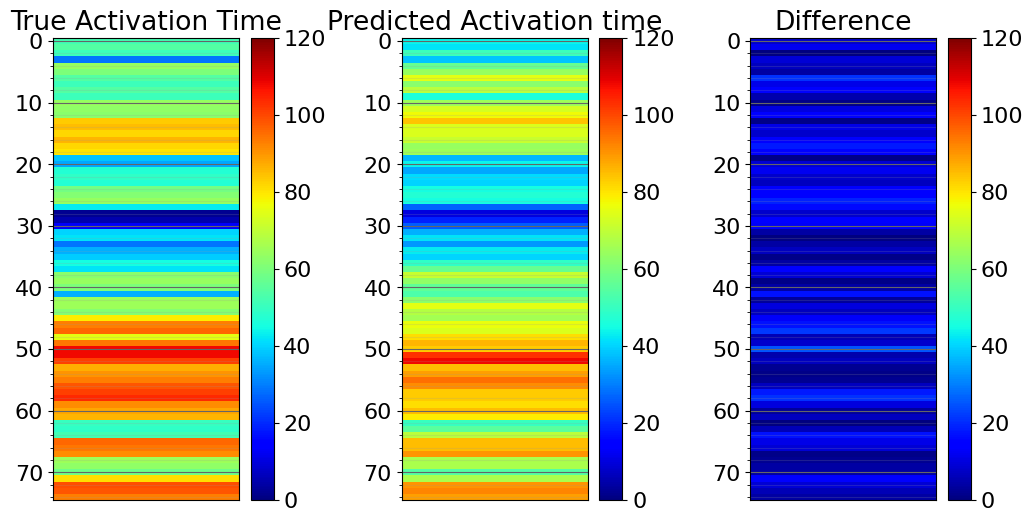

In [ ]:
a_true1 = a_true1.unsqueeze(1)
a_true2 = a_true2.unsqueeze(1)
a_true3 = a_true3.unsqueeze(1)
a_true4 = a_true4.unsqueeze(1)
a_pred1 = torch.round(a_pred1.unsqueeze(1), decimals=0)
a_pred2 = torch.round(a_pred2.unsqueeze(1), decimals=0)
a_pred3 = torch.round(a_pred3.unsqueeze(1), decimals=0)
a_pred4 = torch.round(a_pred4.unsqueeze(1), decimals=0)
a_diff1 = torch.abs(a_true1 - a_pred1)
a_diff2 = torch.abs(a_true2 - a_pred2)
a_diff3 = torch.abs(a_true3 - a_pred3)
a_diff4 = torch.abs(a_true4 - a_pred4)

a_pred1 = a_pred1.detach().numpy()
a_pred2 = a_pred2.detach().numpy()
a_pred3 = a_pred3.detach().numpy()
a_pred4 = a_pred4.detach().numpy()

a_diff1 = a_diff1.detach().numpy()
a_diff2 = a_diff2.detach().numpy()
a_diff3 = a_diff3.detach().numpy()
a_diff4 = a_diff4.detach().numpy()

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

# Plot the first activation time array
plt.subplot(1, 3, 1)
plt.imshow(a_true1, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('True Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the second activation time array
plt.subplot(1, 3, 2)
plt.imshow(a_pred1, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('Predicted Activation time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the absolute difference
plt.subplot(1, 3, 3)
plt.imshow(a_diff1, cmap='jet', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
plt.title('Difference')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)  # Increase horizontal space

# Show the plot
plt.show()

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the SqueezeNetECGtoVM model (using the previously provided class definition)
# Assuming SqueezeNetECGtoVM is already defined

# Example data generation for demonstration
# Replace these with your actual data loading
N = 100  # Number of samples
# all_ecg_data = torch.randn(500, 12, N)  # Example input tensor
# vm_data = torch.randn(500, 75, N)  # Example target tensor

# Create Dataset and DataLoader
training_set = TensorDataset(train_ecg_data, train_vm_activations)
train_loader = DataLoader(training_set, batch_size=64, shuffle=True)

valid_set = TensorDataset(valid_ecg_data, valid_vm_activations)
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=True)

print(len(valid_loader))

# Initialize the model, loss function, and optimizer
# model = SqueezeNetECGtoVM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with learning curve
num_epochs = 150
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs).squeeze(dim=2)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss_prev = running_loss + 0
        running_loss += loss.item()

        if i % 20 == 19:  # Print every 20 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {(running_loss - running_loss_prev) / 1:.4f}')

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation of model after each epoch
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            outputs = model(inputs).squeeze(dim=2)
            loss = criterion(outputs, targets)
            valid_loss += loss.item()

    valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(valid_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {valid_loss:.4f}')

print('Training finished.')

# Example: Saving the model
torch.save(model.state_dict(), 'squeezenet_ecg_to_vm.pth')

# Example: Loading the model
model.load_state_dict(torch.load('squeezenet_ecg_to_vm.pth'))

1


KeyboardInterrupt: 

In [ ]:
model.load_state_dict(torch.load('squeezenet_ecg_to_vm.pth'))

<All keys matched successfully>

In [ ]:
import numpy as np

# Initialize an empty list to collect outputs
output_list = []

for inputs, targets in valid_loader:
    # Get model outputs and remove the dimension of size 1
    outputs = model(inputs).squeeze(dim=2)

    # Convert tensor to NumPy array and append to the list
    output_list.append(outputs.detach().numpy())

    if len(output_list) == 1:
        print(targets)
        print(len(targets))

# Convert the list of arrays into a single NumPy array
output_array = np.concatenate(output_list, axis=0)

print(len(output_array))


tensor([[ 91.,  93.,  88.,  ..., 113., 116., 109.],
        [ 10.,   5.,   1.,  ...,  28.,  33.,  38.],
        [ 89.,  90.,  93.,  ...,  69.,  72.,  72.],
        ...,
        [ 39.,  33.,  27.,  ...,  30.,  25.,  21.],
        [ 48.,  52.,  42.,  ..., 103., 105., 102.],
        [ 93.,  53.,  57.,  ...,  84.,  90.,  90.]])
50
50


In [ ]:
len(valid_loader)

In [ ]:
output_array.shape

(50, 75)

In [ ]:
output_array[0]

array([ 80.55643 ,  64.648994,  67.112785,  68.18082 ,  73.97188 ,
        66.22752 ,  69.52366 ,  67.19776 ,  60.936394,  67.30268 ,
        74.763756,  86.32841 ,  62.191837,  65.99376 ,  56.559498,
        61.197803,  72.93365 ,  60.476154,  57.67046 ,  55.238075,
        58.318665, 103.977486,  87.637535,  90.854614, 107.20203 ,
       102.31975 , 115.40552 ,  86.83233 ,  80.38569 ,  84.10636 ,
        91.77381 ,  76.06062 ,  69.24557 ,  86.33051 ,  82.37579 ,
       113.33067 , 117.05489 , 126.68004 , 129.38579 , 110.23118 ,
       111.75911 , 100.423546,  94.17524 ,  93.98428 ,  85.35365 ,
       100.36385 , 106.12629 ,  77.89784 ,  91.67786 ,  87.09429 ,
        91.68334 , 105.20072 ,  90.71653 ,  97.18424 , 107.22556 ,
       100.204666, 104.38233 ,  89.4381  ,  75.52369 ,  64.24948 ,
        71.69668 ,  77.467   ,  72.55783 ,  78.401566,  67.18681 ,
        85.06578 ,  74.118935,  51.67973 ,  49.65451 ,  49.111332,
        60.80862 ,  73.376   ,  73.81323 ,  70.88766 ,  65.979

In [ ]:
ActTime_reshaped.shape

(75, 1)

(75,)


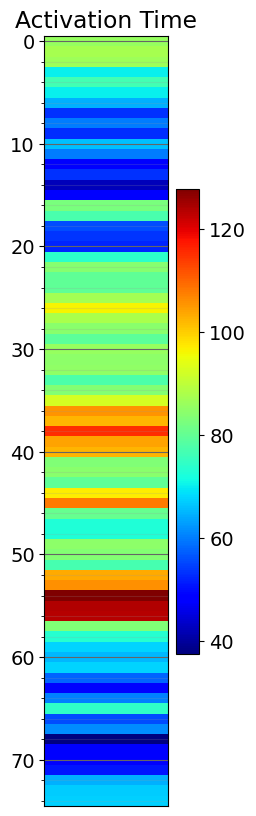

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output_array has the shape (1451, 75)
ActTime = output_array[10]

# Print the shape to confirm
print(ActTime.shape)

# Reshape ActTime to (75, 1)
ActTime_reshaped = ActTime.reshape((75, 1))

# Plot the Activation Time array
plt.figure(figsize=(2, 10))  # Adjust figure size as needed
plt.imshow(ActTime_reshaped, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])  # Optionally remove x-ticks if needed
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


In [ ]:
targets[10].shape

torch.Size([75])

In [ ]:
ActTime1.shape

torch.Size([75])

In [ ]:
ActTime1.shape

(75,)

In [ ]:
ActTime.shape

(75,)

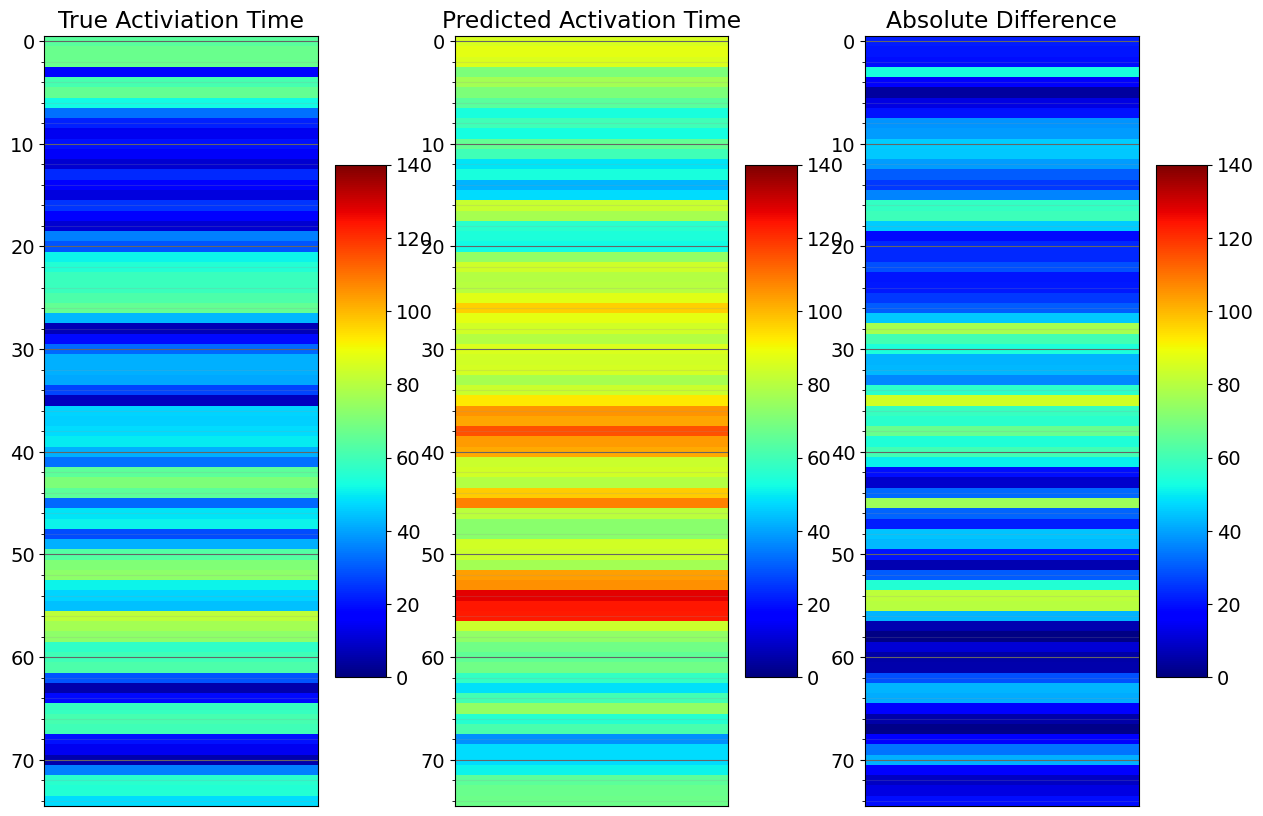

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example of file pair
case = 10
plt.figure(figsize=(15, 10))

ActTime = output_array[10]
ActTime1 = targets[10].unsqueeze(1)

# Reshape ActTime to (75, 1)
ActTime_res = ActTime.reshape((75, 1))
ActTime1_res = ActTime1.reshape((75, 1))

# Compute the absolute difference
ActTime_diff = np.abs(ActTime1_res - ActTime_res)

# Set fixed range for color scaling
vmin = 0
vmax = 140 # Adjust this range according to the expected data values

# Plot the first activation time array
plt.subplot(1, 3, 1)
plt.imshow(ActTime1_res, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('True Activiation Time')
plt.colorbar(shrink=0.8, aspect=10)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the second activation time array
plt.subplot(1, 3, 2)
plt.imshow(ActTime_res, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('Predicted Activation Time')
plt.colorbar(shrink=0.8, aspect=10)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the absolute difference
plt.subplot(1, 3, 3)
plt.imshow(ActTime_diff, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('Absolute Difference')
plt.colorbar(shrink=0.8, aspect=10)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Show the plot
plt.show()


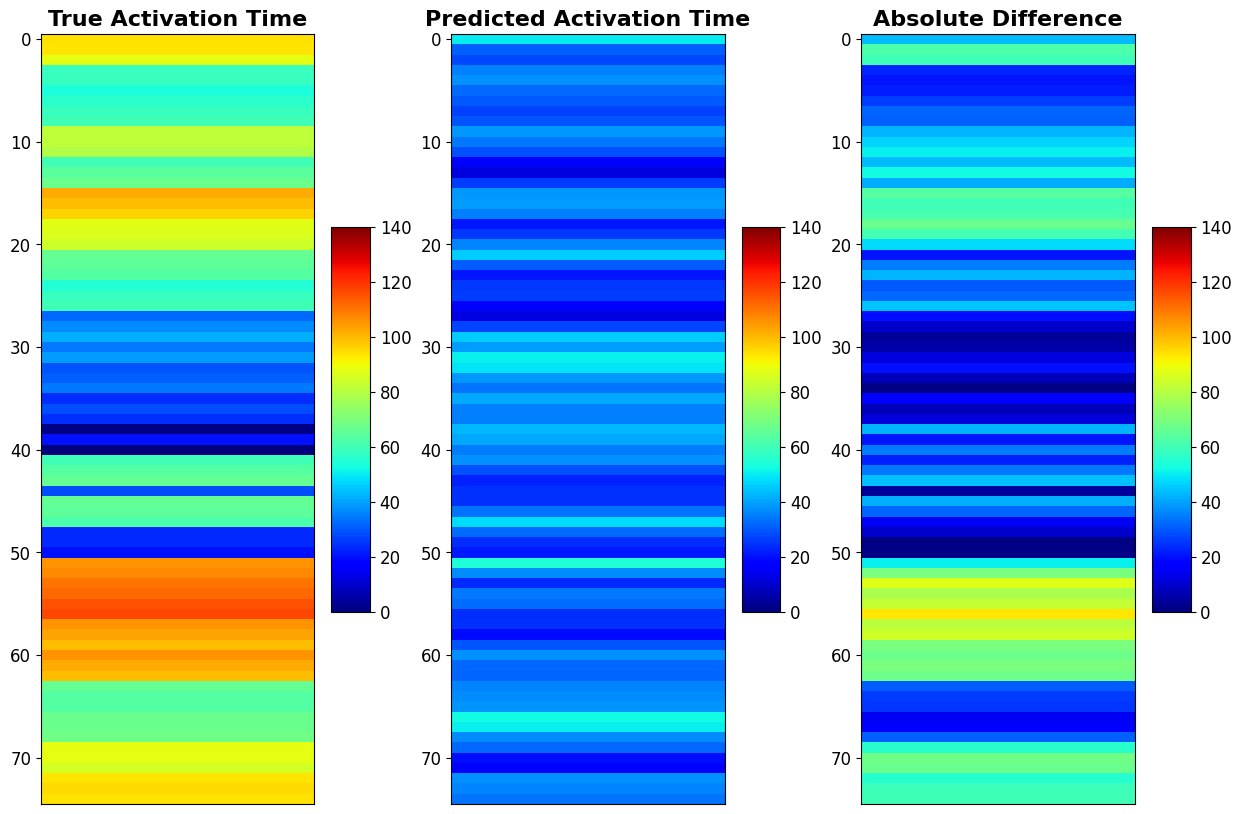

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example of file pair
case = 30
plt.figure(figsize=(15, 10))

ActTime = output_array[30]
ActTime1 = targets[30].unsqueeze(1)

# Reshape ActTime to (75, 1)
ActTime_res = ActTime.reshape((75, 1))
ActTime1_res = ActTime1.reshape((75, 1))

# Compute the absolute difference
ActTime_diff = np.abs(ActTime1_res - ActTime_res)

# Set fixed range for color scaling
vmin = 0
vmax = 140 # Adjust this range according to the expected data values

# Font size settings
title_fontsize = 16
cbar_fontsize = 12
tick_fontsize = 12

# Plot the first activation time array
plt.subplot(1, 3, 1)
im = plt.imshow(ActTime1_res, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('True Activation Time', fontdict={'size': title_fontsize, 'weight': 'bold'})
cbar = plt.colorbar(im, shrink=0.5, aspect=10)
cbar.ax.tick_params(labelsize=cbar_fontsize)
plt.grid(visible=False, which='both')  # Remove both major and minor grid lines
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=tick_fontsize)

# Plot the second activation time array
plt.subplot(1, 3, 2)
im = plt.imshow(ActTime_res, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('Predicted Activation Time', fontdict={'size': title_fontsize, 'weight': 'bold'})
cbar = plt.colorbar(im, shrink=0.5, aspect=10)
cbar.ax.tick_params(labelsize=cbar_fontsize)
plt.grid(visible=False, which='both')  # Remove both major and minor grid lines
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=tick_fontsize)

# Plot the absolute difference
plt.subplot(1, 3, 3)
im = plt.imshow(ActTime_diff, cmap='jet', interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax)
plt.title('Absolute Difference', fontdict={'size': title_fontsize, 'weight': 'bold'})
cbar = plt.colorbar(im, shrink=0.5, aspect=10)
cbar.ax.tick_params(labelsize=cbar_fontsize)
plt.grid(visible=False, which='both')  # Remove both major and minor grid lines
plt.xticks([])  # Remove x-axis ticks
plt.yticks(fontsize=tick_fontsize)

# Show the plot
plt.show()


torch.Size([75, 1])


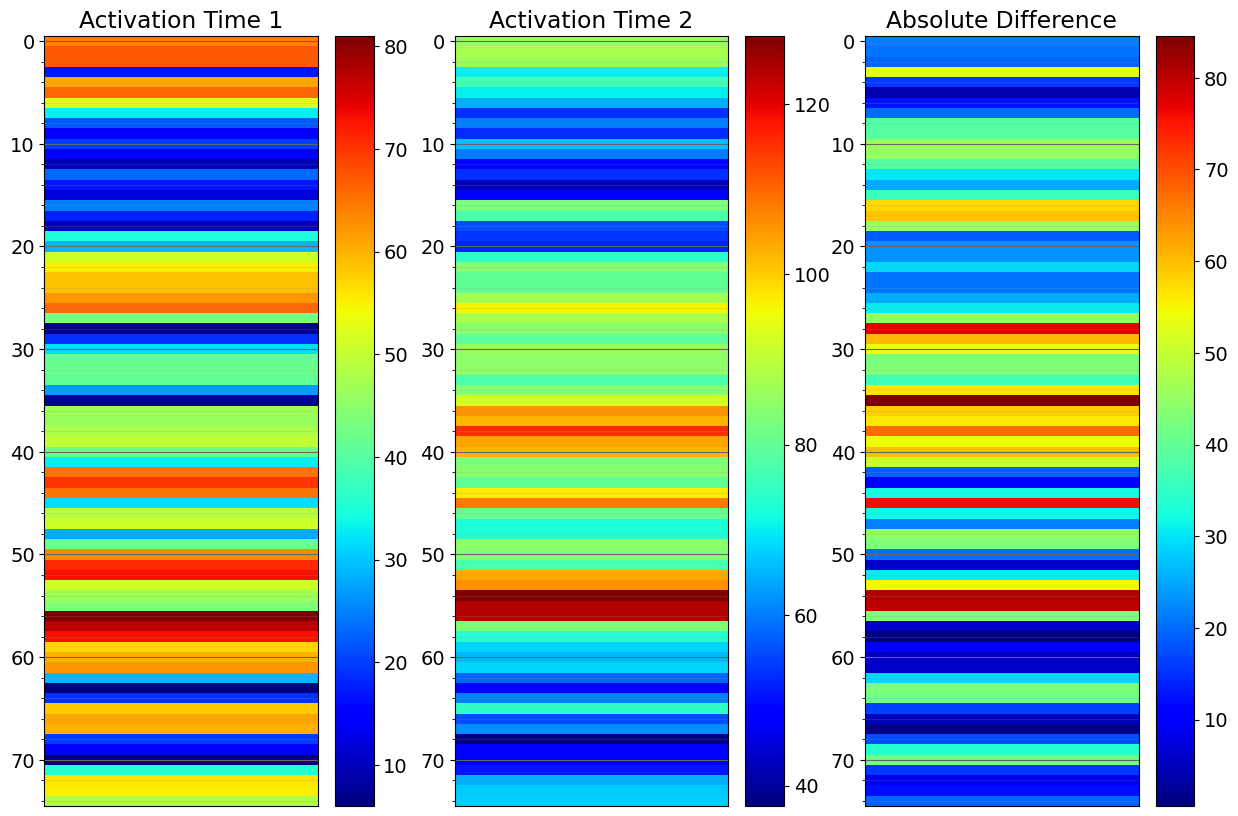

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example of file pair
case = 10
plt.figure(figsize=(15, 10))

ActTime = output_array[10]
ActTime1 = targets[10].unsqueeze(1)

print(ActTime1.shape)

# Reshape ActTime to (75, 1)
ActTime_res = ActTime.reshape((75, 1))
ActTime1_res = ActTime1.reshape((75, 1))

# Compute the absolute difference
ActTime_diff = np.abs(ActTime1_res - ActTime_res)

# Plot the first activation time array
plt.subplot(1, 3, 1)
plt.imshow(ActTime1, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time 1')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the second activation time array
plt.subplot(1, 3, 2)
plt.imshow(ActTime2, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time 2')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Plot the absolute difference
plt.subplot(1, 3, 3)
plt.imshow(ActTime_diff, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Absolute Difference')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Show the plot
plt.show()
